# Fine-Tuning ResNet-18

A lot of the code is from here: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

## Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/colab_projects/cocoapi/notebooks/

/content/drive/MyDrive/colab_projects/cocoapi/notebooks


## CONFIG

In [159]:
WEIGHT_DECAY=10
MODEL_NAME = f'strong-aug-not-so-long-Adam_wd={WEIGHT_DECAY}_2021-06-14'
MODEL_NAME

'strong-aug-not-so-long-Adam_wd=10_2021-06-14'

## Model Descriptions

* batch size: 32
* augmentation
    * baseline train transforms
        1. resize (224x224)
        2. RandomHorizontalFlip(p=0.5)
        3. Normalize (ImageNet constants)
    * SimCLR train transforms
        1. resize (224x224) - the only step not like in SimCLR
        2. Random Horizontal Flip
        3. Random  Color Distortion
        4. Random Gaussian Blur
    * dev transforms
        1. resize (224x224)
        2. Normalize (ImageNet constants)


### baseline-2021-06-09

Last layer training
* epochs: 4 (0, ..., 3)
* optimizer: **SGD(lr=1e-3, momentum=0.9)**
* scheduler: StepLR(step_size=2, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1: 1e-3
    * epochs 2, 3: 1e-4
* weight_decay=0
* momentum=0.9
    
All layers training
* epochs: 10 (4, 5, ..., 13)
* optimizer: **SGD(lr=1e-4, momentum=0.9)**
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 4, ..., 8: 1e-4
    * epochs 9, ..., 13: 1e-5
* weight_decay=0
* momentum=0.9

### baseline-Adam-2021-06-11

Last layer training
* epochs: 4 (0, ..., 3)
* optimizer: **Adam(lr=1e-3)**
* scheduler: StepLR(step_size=2, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1: 1e-3
    * epochs 2, 3: 1e-4
* weight_decay=0
    
All layers training
* epochs: 10 (4, 5, ..., 13)
* optimizer: **Adam(lr=1e-4)**
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 4, ..., 8: 1e-4
    * epochs 9, ..., 13: 1e-5
* **weight_decay=0**

### Adam_wd=1e-08_2021-06-11

Last layer training
* epochs: 4 (0, ..., 3)
* optimizer: Adam(lr=1e-3)
* scheduler: StepLR(step_size=2, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1: 1e-3
    * epochs 2, 3: 1e-4
* **weight_decay=1e-8**
    
All layers training
* epochs: 10 (4, 5, ..., 13)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 4, ..., 8: 1e-4
    * epochs 9, ..., 13: 1e-5
* **weight_decay=1e-8**

### Adam_wd=0.0001_2021-06-11

Last layer training
* epochs: 4 (0, ..., 3)
* optimizer: Adam(lr=1e-3)
* scheduler: StepLR(step_size=2, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1: 1e-3
    * epochs 2, 3: 1e-4
* **weight_decay=1e-4**
    
All layers training
* epochs: 10 (4, 5, ..., 13)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 4, ..., 8: 1e-4
    * epochs 9, ..., 13: 1e-5
* **weight_decay=1e-4**

### Adam_wd=0.01_2021-06-11

Last layer training
* epochs: 4 (0, ..., 3)
* optimizer: Adam(lr=1e-3)
* scheduler: StepLR(step_size=2, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1: 1e-3
    * epochs 2, 3: 1e-4
* **weight_decay=1e-2**
    
All layers training
* epochs: 10 (4, 5, ..., 13)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 4, ..., 8: 1e-4
    * epochs 9, ..., 13: 1e-5
* **weight_decay=1e-2**

### Adam_wd=1_2021-06-11

Last layer training
* epochs: 4 (0, ..., 3)
* optimizer: Adam(lr=1e-3)
* scheduler: StepLR(step_size=2, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1: 1e-3
    * epochs 2, 3: 1e-4
* **weight_decay=1**
    
All layers training
* epochs: 10 (4, 5, ..., 13)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 4, ..., 8: 1e-4
    * epochs 9, ..., 13: 1e-5
* **weight_decay=1**

### Adam_wd=10_2021-06-11

Last layer training
* epochs: 4 (0, ..., 3)
* optimizer: Adam(lr=1e-3)
* scheduler: StepLR(step_size=2, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1: 1e-3
    * epochs 2, 3: 1e-4
* **weight_decay=10**
    
All layers training
* epochs: 10 (4, 5, ..., 13)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 4, ..., 8: 1e-4
    * epochs 9, ..., 13: 1e-5
* **weight_decay=10**

### Adam_wd=100_2021-06-11

Last layer training
* epochs: 4 (0, ..., 3)
* optimizer: Adam(lr=1e-3)
* scheduler: StepLR(step_size=2, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1: 1e-3
    * epochs 2, 3: 1e-4
* **weight_decay=100**
    
All layers training
* epochs: 10 (4, 5, ..., 13)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 4, ..., 8: 1e-4
    * epochs 9, ..., 13: 1e-5
* **weight_decay=100**

### strong-aug-Adam-2021-06-14

Last layer training
* epochs: 4 (0, ..., 3)
* optimizer: Adam(lr=1e-3)
* scheduler: StepLR(step_size=2, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1: 1e-3
    * epochs 2, 3: 1e-4
* **weight_decay=0**
    
All layers training
* epochs: 10 (4, 5, ..., 13)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 4, ..., 8: 1e-4
    * epochs 9, ..., 13: 1e-5
* **weight_decay=0**

### strong-aug-longer-Adam-2021-06-14

Last layer training
* **epochs: 6 (0, ..., 5)**
* optimizer: Adam(lr=1e-3)
* scheduler: StepLR(**step_size=4**, gamma=0.1)
* learning rate alpha:
    * **epochs 0, 1, 2, 3**: 1e-3
    * **epochs 4, 6**: 1e-4
* weight_decay=0
    
All layers training
* **epochs: 14 (6, 8, ..., 19)**
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(**step_size=7**, gamma=0.1)
* learning rate alpha:
    * **epochs 6, ..., 12: 1e-4**
    * **epochs 13, ..., 19: 1e-5**
* weight_decay=0

### strong-aug-even-longer-Adam-2021-06-14

Last layer training
* **epochs: 12 (0, ..., 1)**
* **optimizer: Adam(lr=1e-2)**
* scheduler: StepLR(step_size=4, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1, 2, 3: **1e-2**
    * **epochs 4, 4, 6, 7: 1e-3**
    * **epochs 8, 9, 10, 11: 1e-4**
* weight_decay=0
    
All layers training
* **epochs: 14 (12, 8, ..., 25)**
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(**step_size=7**, gamma=0.1)
* learning rate alpha:
    * **epochs 12, ..., 18: 1e-4**
    * **epochs 19, ..., 25: 1e-5**
* weight_decay=0

### strong-aug-not-so-long-Adam-2021-06-14

Last layer training
* **epochs: 6 (0, ..., 6)**
* **optimizer: Adam(lr=1e-2)**
* scheduler: StepLR(**step_size=3**, gamma=0.1)
* learning rate alpha:
    * **epochs 0, 1, 2: 1e-2**
    * **epochs 3, 4, 5: 1e-3**
* weight_decay=0
    
All layers training
* **epochs: 10 (6, 7, ..., 15)**
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(**step_size=5**, gamma=0.1)
* learning rate alpha:
    * **epochs 6, ..., 10: 1e-4**
    * **epochs 11, ..., 15: 1e-5**
* weight_decay=0

### strong-aug-not-so-long-Adam_wd=0.01_2021-06-14

Last layer training
* **epochs: 6 (0, ..., 6)**
* **optimizer: Adam(lr=1e-2)**
* scheduler: StepLR(step_size=4, gamma=0.1)
* learning rate alpha:
    * **epochs 0, 1, 2: 1e-2**
    * **epochs 3, 4, 5: 1e-3**
* **weight_decay=0.01**
    
All layers training
* epochs: 10 (6, 7, ..., 15)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=5, gamma=0.1)
* learning rate alpha:
    * epochs 6, ..., 10: 1e-4
    * epochs 11, ..., 15: 1e-5
* **weight_decay=0.01**

# Before Training

## Imports

In [4]:
import os
import copy

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import torchvision
from torchvision.io import read_image
from torchvision import datasets, models, transforms

from tqdm.notebook import trange, tqdm

In [5]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [6]:
%cd ./utils/
from dataloaders import CocoNoCropping
from config import CATEGORIES_OF_INTEREST; print(CATEGORIES_OF_INTEREST)
from config import IMG_SIZE; print(IMG_SIZE)
# help(CocoNoCropping) # should not be blank
%cd ..

/content/drive/MyDrive/colab_projects/cocoapi/notebooks/utils
['bird', 'cat', 'dog', 'person']
(224, 224)
/content/drive/My Drive/colab_projects/cocoapi/notebooks


## Transforms, Datasets, and Data Loaders

In [7]:
# Strong augmentation from SimCLR (Appendix A. Data Augmentation Details)
# https://arxiv.org/pdf/2002.05709.pdf

def get_color_distortion(s=1.0):
    # s is the strength of color distortion.
    color_jitter = transforms.ColorJitter(0.8*s, 0.8*s, 0.8*s, 0.2*s)
    rnd_color_jitter = transforms.RandomApply([color_jitter], p=0.8)
    rnd_gray = transforms.RandomGrayscale(p=0.2) # keeps nummber of channels
    color_distort = torch.nn.Sequential(
        rnd_color_jitter,
        rnd_gray)
    
    return color_distort

def get_gaussian_blur(img_size, ratio=0.1):
    # SimCLR: ratio=0.1
    
    # calculating kernel_size and making it odd
    kernel_size = int(img_size[0] * ratio)
    if kernel_size % 2 == 0:
        kernel_size += 1
        
    # sigma=(0.1, 2.0) is default for GaussianBlur; it is also the same in Sim CLR
    gaussian_blur = transforms.GaussianBlur(kernel_size=kernel_size, sigma=(0.1, 2.0))
    
    # SimCLR: p=0.5 
    rnd_gaussian_blur = transforms.RandomApply([gaussian_blur], p=0.5)
    
    return rnd_gaussian_blur

In [8]:
baseline_train_transforms = torch.nn.Sequential(
    transforms.Resize(size=IMG_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)), # ImageNet constants
)



SimCLR_train_transforms = torch.nn.Sequential(
    transforms.Resize(size=IMG_SIZE), # different from SimCLR
    
    # SimCLR aug start
    transforms.RandomHorizontalFlip(),
    get_color_distortion(s=1.0),
    get_gaussian_blur(IMG_SIZE),
    # SimCLR aug end
    
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)), # ImageNet constants
)



dev_transforms = torch.nn.Sequential(
    transforms.Resize(size=IMG_SIZE),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)), # ImageNet constants
)

In [9]:
train1_dataset = CocoNoCropping(
    img_ids = '../my_splits/train1_ids.txt',
    my_annotations_file = '../my_annotations/imgIds_to_labels_train2017.json',
    img_dir = '../my_images/train1/',
    transform=SimCLR_train_transforms,
    divide_by_255=True
)

dev1_dataset = CocoNoCropping(
    img_ids = '../my_splits/dev1_ids.txt',
    my_annotations_file = '../my_annotations/imgIds_to_labels_train2017.json',
    img_dir = '../my_images/dev1/',
    transform=dev_transforms,
    divide_by_255=True
)

In [10]:
# droplast since the number of images is likely not to be divisible by batch_size
example_dataloader = DataLoader(train1_dataset, batch_size=8, shuffle=True, drop_last=True) # for visualization

train1_dataloader = DataLoader(train1_dataset, batch_size=32, shuffle=True, drop_last=True)
dev1_dataloader = DataLoader(dev1_dataset, batch_size=32, shuffle=False, drop_last=True)

## Visualize a few images

(228, 1810, 3)


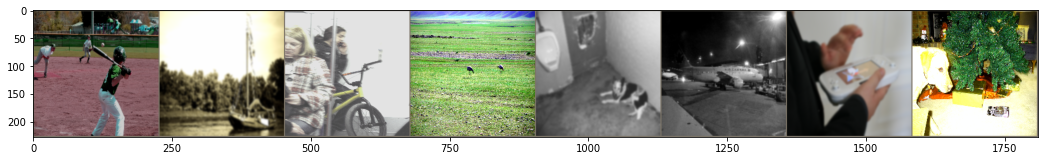

,0,1,2,3,4,5,6,7
bird,0,1,0,1,0,0,0,0
cat,0,0,0,0,0,0,0,0
dog,0,0,0,0,1,0,0,1
person,1,1,1,0,0,0,1,0


(228, 1810, 3)


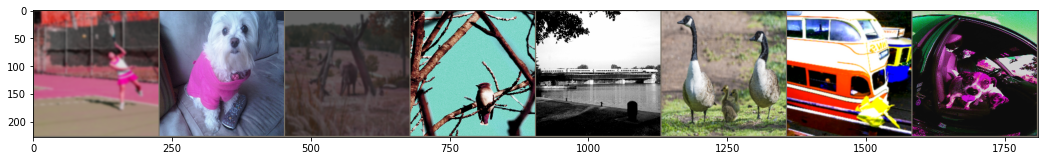

,0,1,2,3,4,5,6,7
bird,0,0,0,1,0,1,0,0
cat,0,0,0,0,0,0,0,0
dog,0,1,0,0,0,0,0,1
person,1,0,0,0,0,0,1,1


(228, 1810, 3)


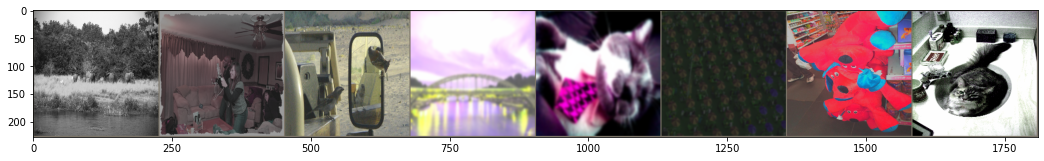

,0,1,2,3,4,5,6,7
bird,1,0,1,0,0,0,0,0
cat,0,0,0,0,1,0,0,1
dog,0,0,0,0,0,0,1,0
person,0,1,0,0,0,1,1,0


(228, 1810, 3)


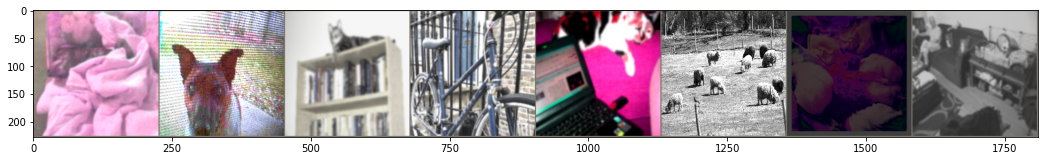

,0,1,2,3,4,5,6,7
bird,0,0,0,0,0,1,0,0
cat,0,0,1,0,1,0,1,0
dog,1,1,0,0,0,0,0,1
person,0,0,0,0,0,0,0,1


(228, 1810, 3)


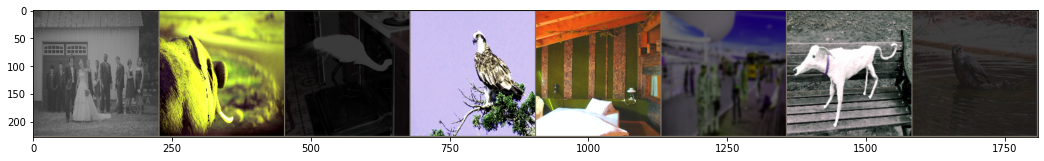

,0,1,2,3,4,5,6,7
bird,0,0,1,1,0,1,0,1
cat,0,0,0,0,0,0,0,0
dog,0,0,0,0,0,0,1,0
person,1,0,0,0,0,1,0,0


(228, 1810, 3)


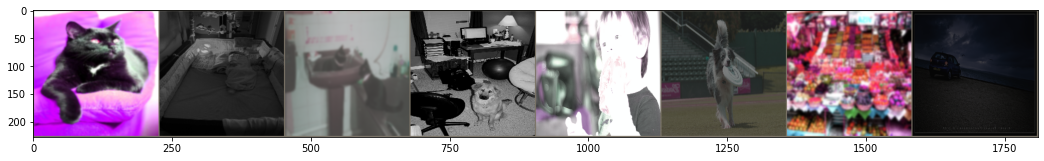

,0,1,2,3,4,5,6,7
bird,0,0,0,0,0,0,0,1
cat,1,0,1,0,0,0,0,0
dog,0,0,0,1,0,1,0,0
person,0,1,0,0,1,0,0,0


NameError: ignored

In [11]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    print(inp.shape)
    
    # ImageNet constants
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


LIMIT = 5
for i, batch in enumerate(example_dataloader):
    inputs, labels = batch['image'], batch['label']

    # Make a grid from batch
    out = torchvision.utils.make_grid(inputs)

    plt.subplots(figsize=(18, 3))
    imshow(out)

    display(pd.DataFrame({CATEGORIES_OF_INTEREST[i]: labels[i].numpy() for i in range(len(labels))}).T)
    
    if i == LIMIT:
        break

## Training and Validation Loops

In [12]:
def train_one_epoch(iterator, model, criterion, optimizer):
    total = 0
    epoch_loss = 0
    per_class_correct = torch.zeros(4)
    
    for batch in tqdm(iterator, desc='train'):
        model.train()

        inputs = batch['image'].to(device) # [batch size, channel, h, w]
        #print(inputs.shape, inputs.dtype)
        # right now, `labels` is a list with num_classes tensors, each tensor with batch_size of labels (integers)
        labels = torch.vstack(batch['label']).T.contiguous().to(torch.float32).to(device)
        #print(labels.shape, labels.dtype, labels.is_contiguous()) # labels
        total += labels.shape[0]
        
        optimizer.zero_grad()

        outputs = model(inputs) #logits
        #print(outputs.shape, outputs.dtype, outputs.is_contiguous())
        #print(outputs)

        loss = criterion(outputs, labels)
        epoch_loss += loss.item() # no need to drag 
        #print(loss.item())

        loss.backward()
        optimizer_ft.step()

        preds = (outputs > 0.5).detach().to(torch.int32) # no need to drag the gradients
        #print(preds)
        per_class_correct += (preds.cpu() == labels.cpu()).sum(0) # 0-th axis for batch_size
        #print(per_class_correct)
    
    avg_epoch_loss = epoch_loss / total
    avg_per_class_acc = per_class_correct / total
    
    return avg_epoch_loss, avg_per_class_acc

In [13]:
def evaluate(iterator, model, criterion):
    total = 0
    epoch_loss = 0
    per_class_correct = torch.zeros(4)
    
    for batch in tqdm(iterator, desc='dev'):
        
        # no need for gradients, batch-norm and dropout in evaluation mode
        model.eval()
        with torch.no_grad():
            
            inputs = batch['image'].to(device) # [batch size, channel, h, w]
            #print(inputs.shape, inputs.dtype)
            # right now, `labels` is a list with num_classes tensors, each tensor with batch_size of labels (integers)
            labels = torch.vstack(batch['label']).T.contiguous().to(torch.float32).to(device)
            #print(labels.shape, labels.dtype, labels.is_contiguous()) # labels
            total += labels.shape[0]

            outputs = model(inputs) #logits
            #print(outputs.shape, outputs.dtype, outputs.is_contiguous())
            #print(outputs)

            loss = criterion(outputs, labels)
            epoch_loss += loss.item() # no need to drag 
            #print(loss.item())

            preds = (outputs > 0.5).detach().to(torch.int32) # no need to drag the gradients
            #print(preds)
            per_class_correct += (preds.cpu() == labels.cpu()).sum(0) # 0-th axis for batch_size
            #print(per_class_correct)
    
    avg_epoch_loss = epoch_loss / total
    avg_per_class_acc = per_class_correct / total
    
    return avg_epoch_loss, avg_per_class_acc

# Training

## Fine-tune only the last layer

In [160]:
device

'cuda:0'

In [161]:
# load pre-trained model
model_ft = models.resnet18(pretrained=True)

# freese all parameters initially
for param in model_ft.parameters():
    param.requires_grad = False
    
# unfreeeze model parameters of the last layer
for param in model_ft.fc.parameters():
    param.requires_grad = True

# replace the last layer to fit the task
num_ftrs = model_ft.fc.in_features
model_ft.fc = torch.nn.Linear(num_ftrs, len(CATEGORIES_OF_INTEREST))

# place it on the device
model_ft = model_ft.to(device)

criterion = torch.nn.BCEWithLogitsLoss(reduction='sum')

# Observe that all parameters are being optimized
optimizer_ft = torch.optim.Adam(model_ft.parameters(), lr=0.01) # weight_decay=WEIGHT_DECAY

# Decay LR by a factor of `gamma` every `step_size` epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_ft, step_size=3, gamma=0.1)

In [162]:
#model_ft

Epoch: 0



Train Avg Acc: 0.7546875476837158
Train Loss: 2.474960136413574
Train Accs per class: tensor([0.8000, 0.7797, 0.7453, 0.6938])




Dev Avg Acc: 0.8019531965255737
Dev Loss: 1.7176959246397019
Dev Accs per class: tensor([0.8156, 0.8656, 0.7828, 0.7437])


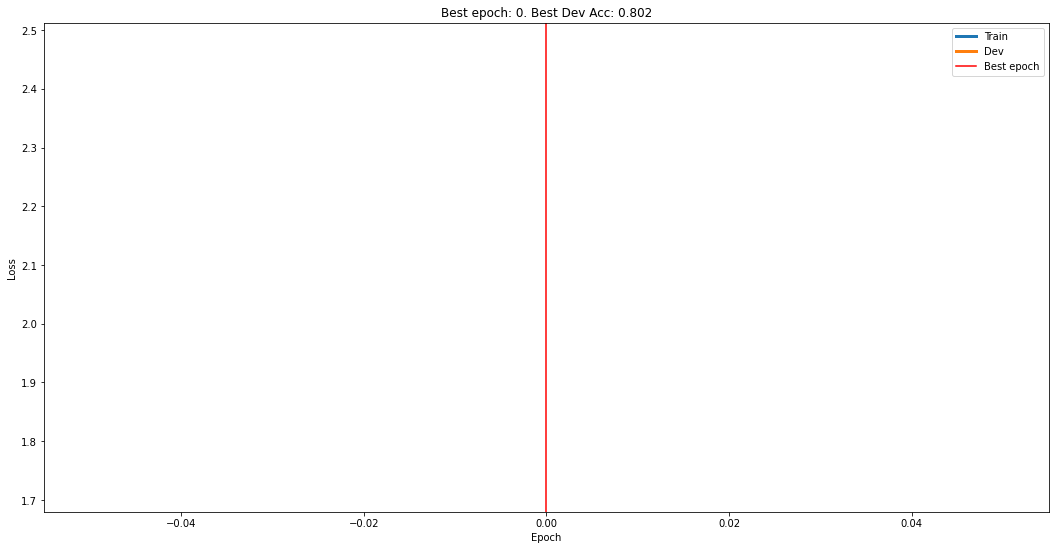


--------------------------------------------------------------------------------

Epoch: 1



Train Avg Acc: 0.8011718988418579
Train Loss: 1.7937079966068268
Train Accs per class: tensor([0.8406, 0.8203, 0.8016, 0.7422])




Dev Avg Acc: 0.841015636920929
Dev Loss: 1.4577545911073684
Dev Accs per class: tensor([0.8484, 0.8750, 0.8203, 0.8203])


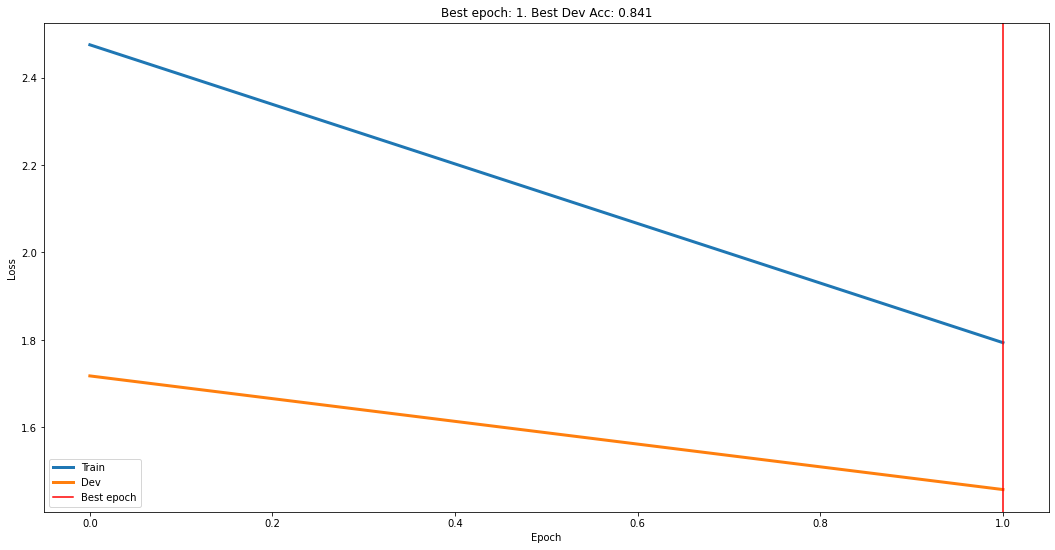


--------------------------------------------------------------------------------

Epoch: 2



Train Avg Acc: 0.8218750357627869
Train Loss: 1.6057116746902467
Train Accs per class: tensor([0.8500, 0.8500, 0.8094, 0.7781])




Dev Avg Acc: 0.8484375476837158
Dev Loss: 1.4069367885589599
Dev Accs per class: tensor([0.8562, 0.8938, 0.8219, 0.8219])


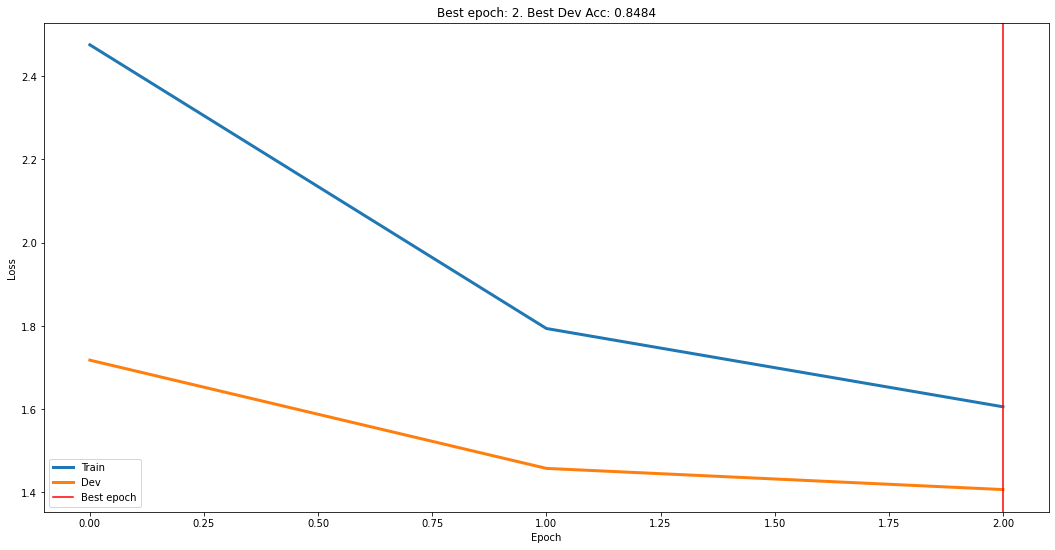


--------------------------------------------------------------------------------

Epoch: 3



Train Avg Acc: 0.8433593511581421
Train Loss: 1.4031774342060088
Train Accs per class: tensor([0.8609, 0.8687, 0.8406, 0.8031])




Dev Avg Acc: 0.8492187261581421
Dev Loss: 1.3911750108003615
Dev Accs per class: tensor([0.8484, 0.8953, 0.8250, 0.8281])


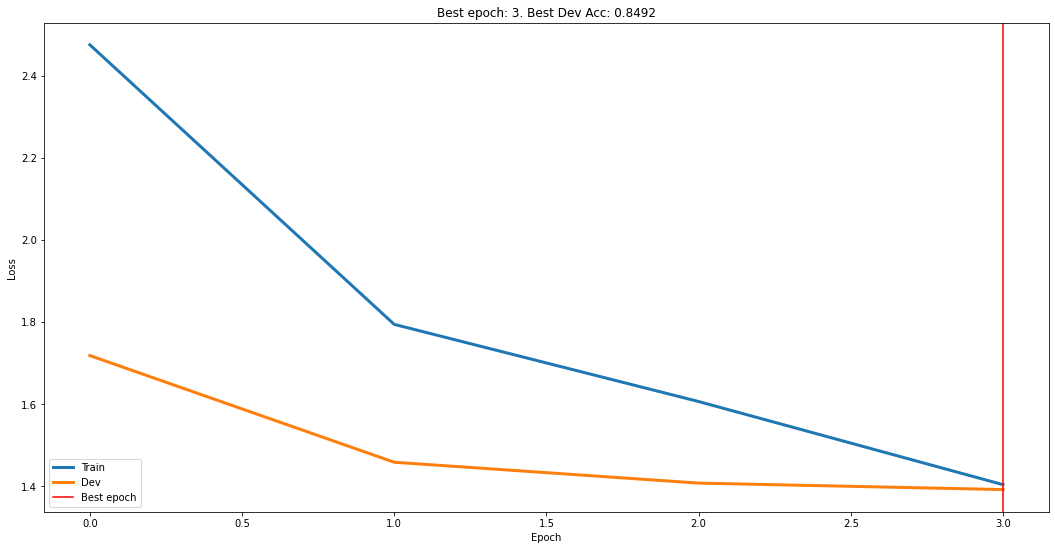


--------------------------------------------------------------------------------

Epoch: 4



Train Avg Acc: 0.8441406488418579
Train Loss: 1.3678213715553285
Train Accs per class: tensor([0.8641, 0.8562, 0.8297, 0.8266])




Dev Avg Acc: 0.8542969226837158
Dev Loss: 1.394615039229393
Dev Accs per class: tensor([0.8562, 0.8953, 0.8281, 0.8375])


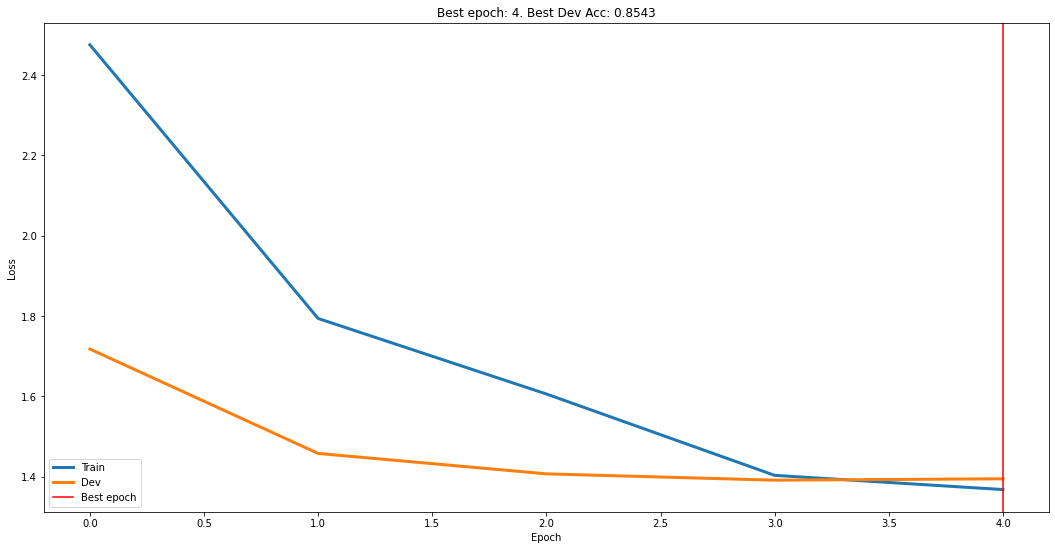


--------------------------------------------------------------------------------

Epoch: 5



Train Avg Acc: 0.848437488079071
Train Loss: 1.3833625137805938
Train Accs per class: tensor([0.8562, 0.8797, 0.8328, 0.8250])




Dev Avg Acc: 0.8562500476837158
Dev Loss: 1.381076991558075
Dev Accs per class: tensor([0.8562, 0.8969, 0.8266, 0.8453])


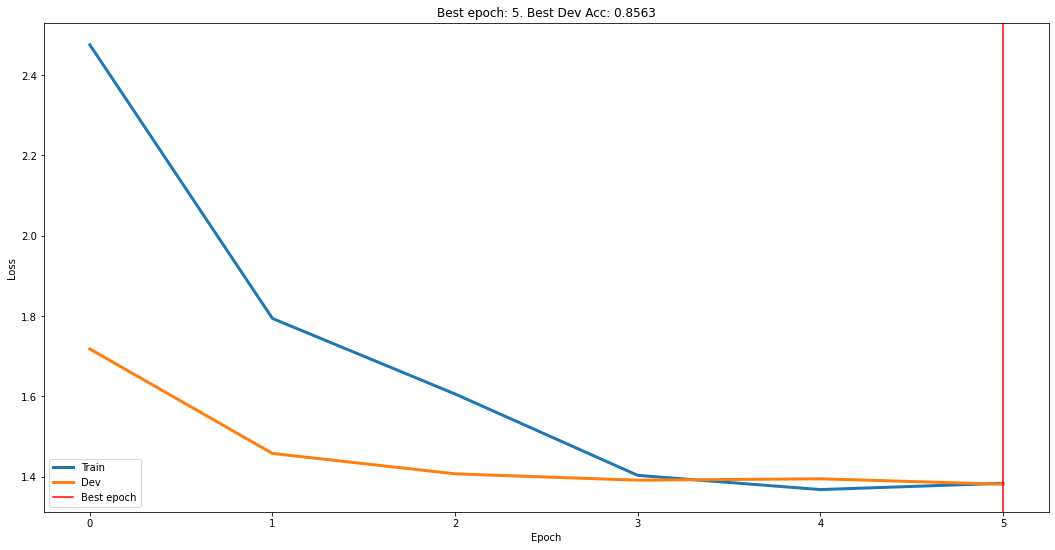


--------------------------------------------------------------------------------


CPU times: user 3min 51s, sys: 5.83 s, total: 3min 57s
Wall time: 4min 6s


In [163]:
%%time
last_layer_num_epochs = 6

train_epoch_loss_history = []
train_per_class_acc_history = []

dev_epoch_loss_history = []
dev_per_class_acc_history = []

dev_epoch_acc_history = []
train_epoch_acc_history = []

best_acc = None
best_epoch = None

best_model_wts = copy.deepcopy(model_ft.state_dict())

for epoch in trange(last_layer_num_epochs, desc='epoch'):
    print('Epoch:', epoch)
    # train
    avg_epoch_loss, avg_per_class_acc = train_one_epoch(iterator=train1_dataloader,
                                                        model=model_ft, criterion=criterion,
                                                        optimizer=optimizer_ft)
    avg_acc = avg_per_class_acc.mean().item()
    train_epoch_acc_history.append(avg_acc)
    print('Train Avg Acc:', avg_acc)
    train_epoch_loss_history.append(avg_epoch_loss)
    train_per_class_acc_history.append(avg_per_class_acc)
    print('Train Loss:', avg_epoch_loss)
    print('Train Accs per class:', avg_per_class_acc)
    print()
    
    # evaluate on the dev set
    avg_epoch_loss, avg_per_class_acc = evaluate(iterator=dev1_dataloader,
                                                 model=model_ft, criterion=criterion)
    avg_acc = avg_per_class_acc.mean().item()
    dev_epoch_acc_history.append(avg_acc)
    print('Dev Avg Acc:', avg_acc)
    dev_epoch_loss_history.append(avg_epoch_loss)
    dev_per_class_acc_history.append(avg_per_class_acc)
    print('Dev Loss:', avg_epoch_loss)
    print('Dev Accs per class:', avg_per_class_acc)
    
    
        
    if (not best_acc) or avg_acc > best_acc:
        best_epoch = epoch
        best_acc = avg_acc
        
        best_model_wts = copy.deepcopy(model_ft.state_dict())

    # lr scheduler step
    exp_lr_scheduler.step()

    # plot
    plt.figure(figsize=(18, 9))
    plt.plot(np.arange(len(train_epoch_loss_history)), train_epoch_loss_history, label=f'Train', linewidth=3)
    plt.plot(np.arange(len(dev_epoch_loss_history)), dev_epoch_loss_history, label=f'Dev', linewidth=3)
    plt.axvline(x=best_epoch, label='Best epoch', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Best epoch: {best_epoch}. Best Dev Acc: {best_acc:.4}')
    plt.legend(loc='best')
    plt.show()


    print()
    print('-'*80)
    print()

## Fine-tune all layers with lower learning rate

In [164]:
device

'cuda:0'

In [165]:
# unfreese all parameters initially
for param in model_ft.parameters():
    param.requires_grad = True

criterion = torch.nn.BCEWithLogitsLoss(reduction='sum')

# Observe that all parameters are being optimized
optimizer_ft = torch.optim.Adam(model_ft.parameters(), lr=0.0001, weight_decay=WEIGHT_DECAY)

# Decay LR by a factor of `gamma` every `step_size` epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_ft, step_size=5, gamma=0.1)

Epoch: 6



Train Avg Acc: 0.8492187261581421
Train Loss: 1.3818896889686585
Train Accs per class: tensor([0.8562, 0.8703, 0.8484, 0.8219])




Dev Avg Acc: 0.862109363079071
Dev Loss: 1.3631189823150636
Dev Accs per class: tensor([0.8531, 0.9000, 0.8313, 0.8641])


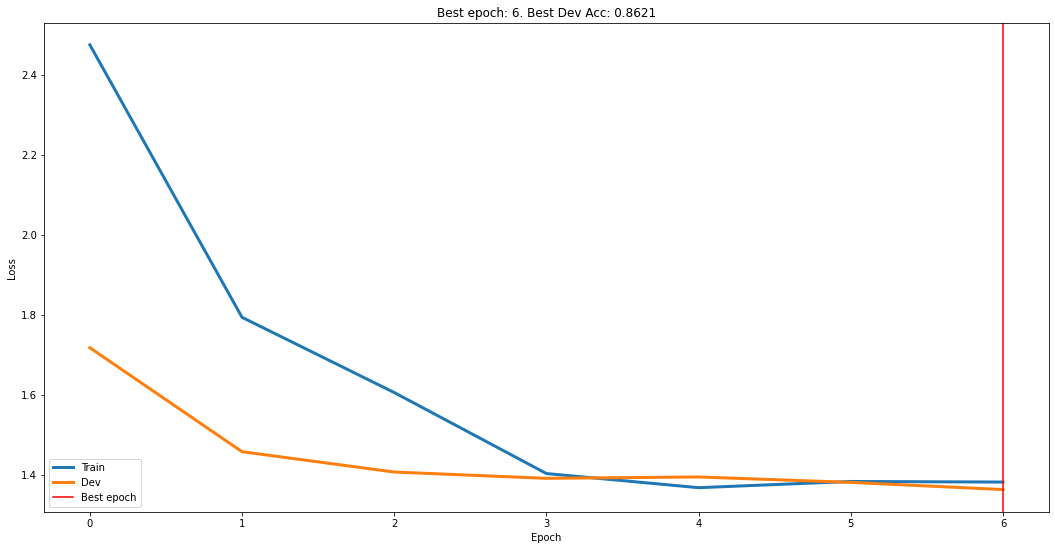


--------------------------------------------------------------------------------

Epoch: 7



Train Avg Acc: 0.8644530773162842
Train Loss: 1.2008395493030548
Train Accs per class: tensor([0.8719, 0.8984, 0.8531, 0.8344])




Dev Avg Acc: 0.8597655892372131
Dev Loss: 1.3503845244646073
Dev Accs per class: tensor([0.8547, 0.9109, 0.8266, 0.8469])


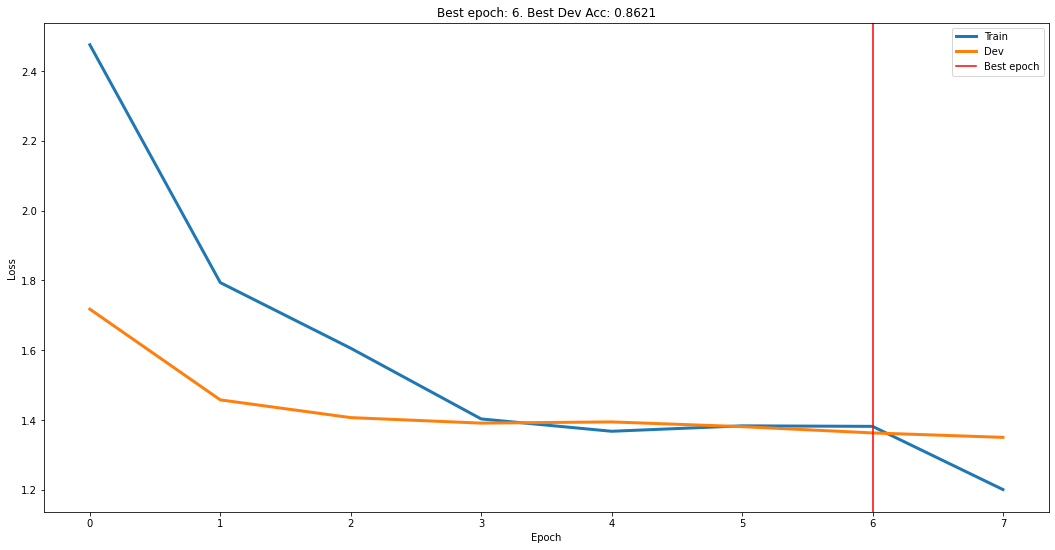


--------------------------------------------------------------------------------

Epoch: 8



Train Avg Acc: 0.8777344226837158
Train Loss: 1.0471819251775742
Train Accs per class: tensor([0.8844, 0.9094, 0.8641, 0.8531])




Dev Avg Acc: 0.8628906011581421
Dev Loss: 1.3392913907766342
Dev Accs per class: tensor([0.8562, 0.8984, 0.8375, 0.8594])


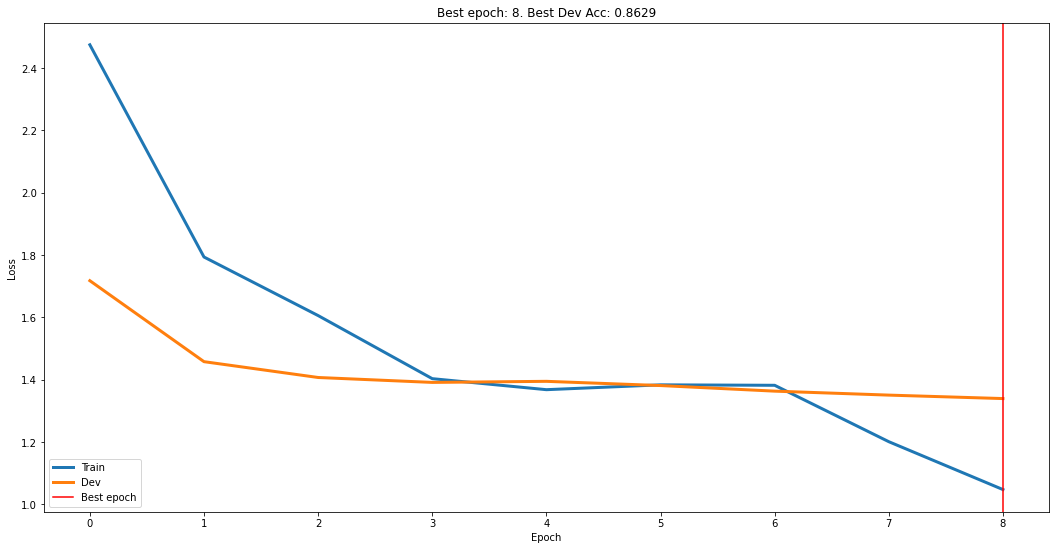


--------------------------------------------------------------------------------

Epoch: 9



Train Avg Acc: 0.9027343988418579
Train Loss: 0.9505723387002945
Train Accs per class: tensor([0.9000, 0.9359, 0.8984, 0.8766])




Dev Avg Acc: 0.856640636920929
Dev Loss: 1.3695523291826248
Dev Accs per class: tensor([0.8500, 0.9000, 0.8250, 0.8516])


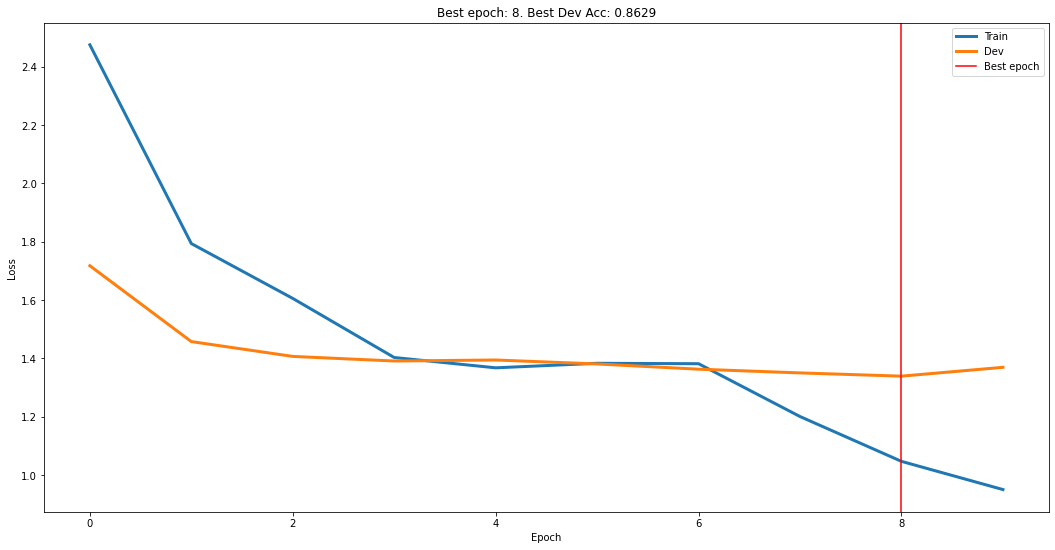


--------------------------------------------------------------------------------

Epoch: 10



Train Avg Acc: 0.9097656011581421
Train Loss: 0.8649110049009323
Train Accs per class: tensor([0.9203, 0.9297, 0.9031, 0.8859])




Dev Avg Acc: 0.8667969107627869
Dev Loss: 1.3645029336214065
Dev Accs per class: tensor([0.8609, 0.9078, 0.8344, 0.8641])


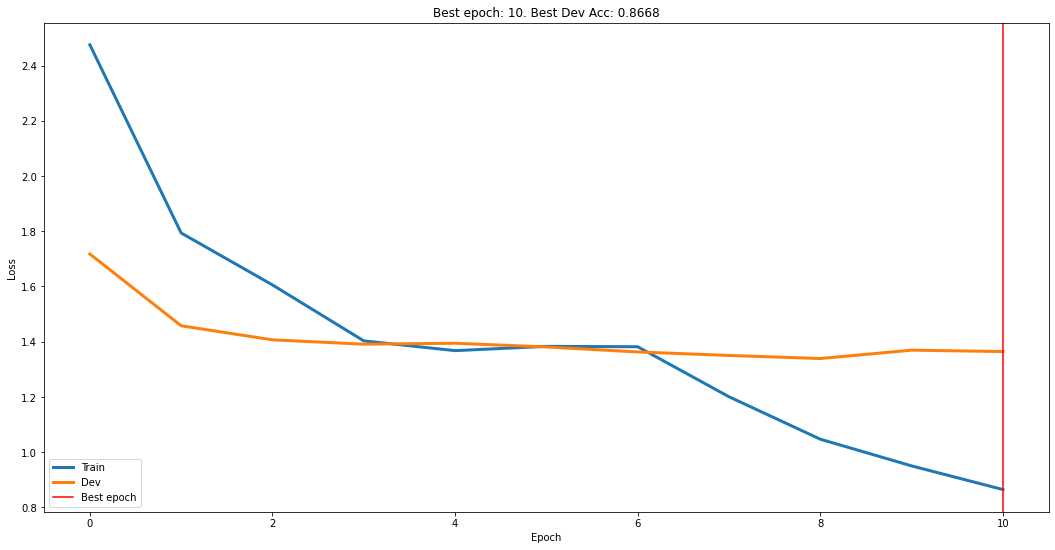


--------------------------------------------------------------------------------

Epoch: 11



Train Avg Acc: 0.916015625
Train Loss: 0.7859572231769562
Train Accs per class: tensor([0.9312, 0.9391, 0.9109, 0.8828])




Dev Avg Acc: 0.868359386920929
Dev Loss: 1.350027683377266
Dev Accs per class: tensor([0.8609, 0.9094, 0.8359, 0.8672])


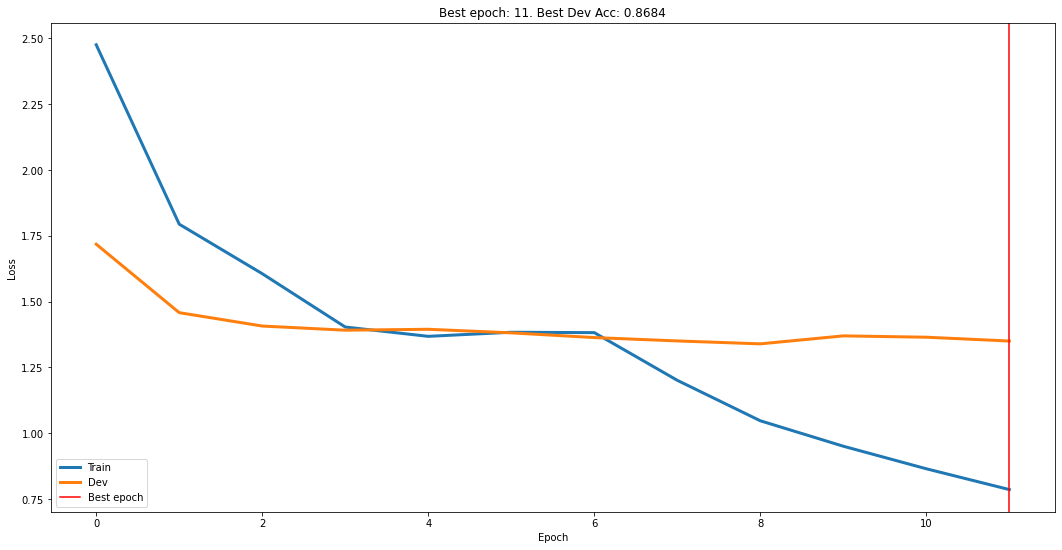


--------------------------------------------------------------------------------

Epoch: 12



Train Avg Acc: 0.9136718511581421
Train Loss: 0.7583549886941909
Train Accs per class: tensor([0.9016, 0.9375, 0.9078, 0.9078])




Dev Avg Acc: 0.8679687976837158
Dev Loss: 1.3361674815416336
Dev Accs per class: tensor([0.8594, 0.9125, 0.8391, 0.8609])


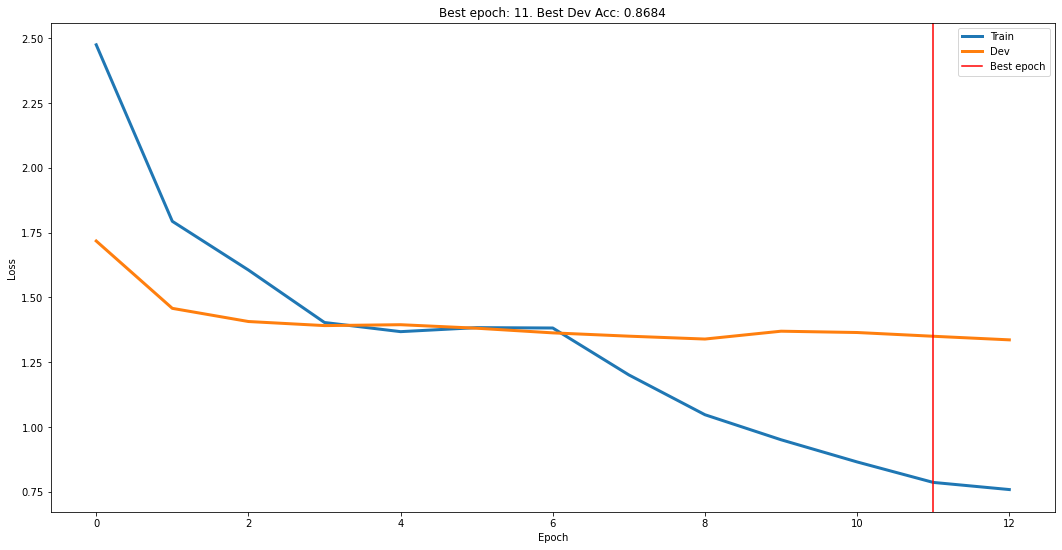


--------------------------------------------------------------------------------

Epoch: 13



Train Avg Acc: 0.9273437261581421
Train Loss: 0.7098162353038788
Train Accs per class: tensor([0.9234, 0.9422, 0.9422, 0.9016])




Dev Avg Acc: 0.8667968511581421
Dev Loss: 1.3367352485656738
Dev Accs per class: tensor([0.8609, 0.9109, 0.8328, 0.8625])


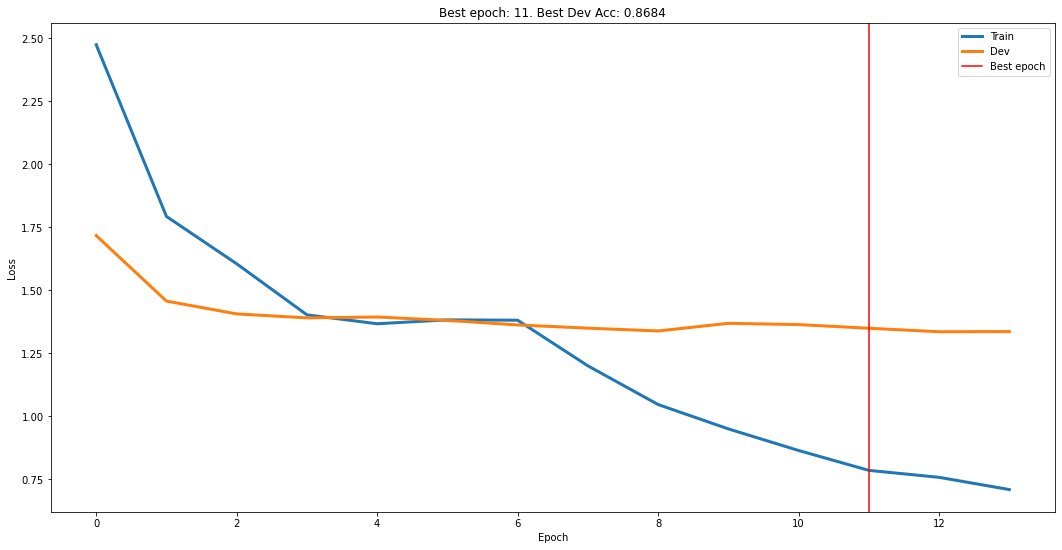


--------------------------------------------------------------------------------

Epoch: 14



Train Avg Acc: 0.9242187738418579
Train Loss: 0.7268290519714355
Train Accs per class: tensor([0.9344, 0.9438, 0.9187, 0.9000])




Dev Avg Acc: 0.8679687976837158
Dev Loss: 1.3341798037290573
Dev Accs per class: tensor([0.8578, 0.9125, 0.8359, 0.8656])


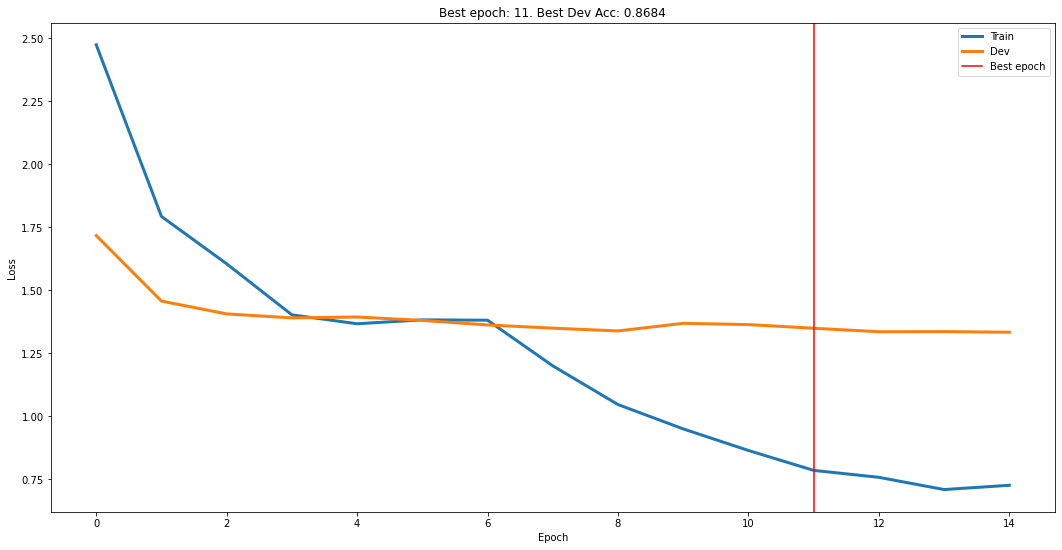


--------------------------------------------------------------------------------

Epoch: 15



Train Avg Acc: 0.9261718988418579
Train Loss: 0.6803484305739402
Train Accs per class: tensor([0.9281, 0.9375, 0.9234, 0.9156])




Dev Avg Acc: 0.8660156726837158
Dev Loss: 1.336668112874031
Dev Accs per class: tensor([0.8578, 0.9094, 0.8328, 0.8641])


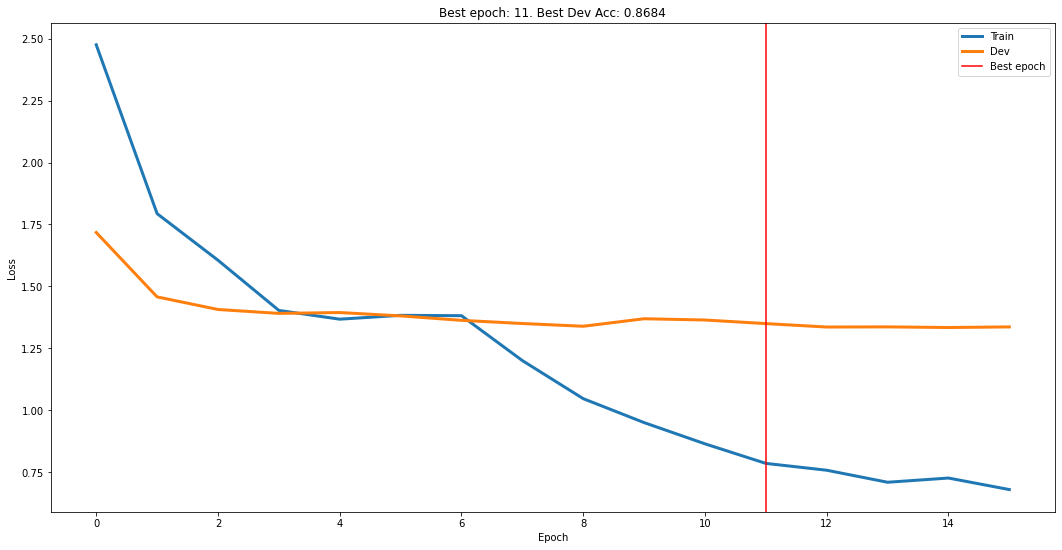


--------------------------------------------------------------------------------




In [166]:
all_layers_num_epochs = 10

for epoch in trange(last_layer_num_epochs, last_layer_num_epochs+all_layers_num_epochs, desc='epoch'):
    print('Epoch:', epoch)
    # train
    avg_epoch_loss, avg_per_class_acc = train_one_epoch(iterator=train1_dataloader,
                                                        model=model_ft, criterion=criterion,
                                                        optimizer=optimizer_ft)
    avg_acc = avg_per_class_acc.mean().item()
    train_epoch_acc_history.append(avg_acc)
    print('Train Avg Acc:', avg_acc)
    train_epoch_loss_history.append(avg_epoch_loss)
    train_per_class_acc_history.append(avg_per_class_acc)
    print('Train Loss:', avg_epoch_loss)
    print('Train Accs per class:', avg_per_class_acc)
    print()
    
    # evaluate on the dev set
    avg_epoch_loss, avg_per_class_acc = evaluate(iterator=dev1_dataloader,
                                                 model=model_ft, criterion=criterion)
    avg_acc = avg_per_class_acc.mean().item()
    dev_epoch_acc_history.append(avg_acc)
    print('Dev Avg Acc:', avg_acc)
    dev_epoch_loss_history.append(avg_epoch_loss)
    dev_per_class_acc_history.append(avg_per_class_acc)
    print('Dev Loss:', avg_epoch_loss)
    print('Dev Accs per class:', avg_per_class_acc)
    
    if (not best_acc) or avg_acc > best_acc:
        best_epoch = epoch
        best_acc = avg_acc
        
        best_model_wts = copy.deepcopy(model_ft.state_dict())

    # lr scheduler step
    exp_lr_scheduler.step()

    # plot
    plt.figure(figsize=(18, 9))
    plt.plot(np.arange(len(train_epoch_loss_history)), train_epoch_loss_history, label=f'Train', linewidth=3)
    plt.plot(np.arange(len(dev_epoch_loss_history)), dev_epoch_loss_history, label=f'Dev', linewidth=3)
    plt.axvline(x=best_epoch, label='Best epoch', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Best epoch: {best_epoch}. Best Dev Acc: {best_acc:.4}')
    plt.legend(loc='best')
    plt.show()


    print()
    print('-'*80)
    print()

### Save weights

In [167]:
%mkdir ../weights

mkdir: cannot create directory ‘../weights’: File exists


In [168]:
torch.save(model_ft.state_dict(), f'../weights/{MODEL_NAME}.pth')

In [169]:
%ls ../weights

'Adam_wd=0.0001_2021-06-11.pth'
'Adam_wd=0.01_2021-06-11.pth'
'Adam_wd=100_2021-06-11.pth'
'Adam_wd=10_2021-06-11.pth'
'Adam_wd=1_2021-06-11.pth'
'Adam_wd=1e-08_2021-06-11.pth'
 baseline-2021-06-09.pth
 baseline-Adam-2021-06-11.pth
 strong-aug-Adam-2021-06-14.pth
 strong-aug-even-longer-Adam-2021-06-14.pth
 strong-aug-longer-Adam-2021-06-14.pth
 strong-aug-not-so-long-Adam-2021-06-14.pth
'strong-aug-not-so-long-Adam_wd=0.01_-2021-06-14.pth'
'strong-aug-not-so-long-Adam_wd=0.1_-2021-06-14.pth'
'strong-aug-not-so-long-Adam_wd=10_2021-06-14.pth'
'strong-aug-not-so-long-Adam_wd=1_2021-06-14.pth'


## Save history

In [170]:
%mkdir ../history

mkdir: cannot create directory ‘../history’: File exists


In [171]:
history = {
    'train_losses': [float(el) for el in train_epoch_loss_history],
    'dev_losses': [float(el) for el in dev_epoch_loss_history],

    'train_per_class_accuracies': [list(el.numpy().astype(float)) for el in train_per_class_acc_history],
    'dev_per_class_accuracies': [list(el.numpy().astype(float)) for el in dev_per_class_acc_history],

    'train_average_accuracies': [float(el) for el in train_epoch_acc_history],
    'dev_average_accuracies': [float(el) for el in dev_epoch_acc_history],
    
    'best_epoch': best_epoch,
    'best_acc': best_acc
}

In [172]:
with open(f'../history/{MODEL_NAME}.json', 'w') as f:
    json.dump(history, f)

In [173]:
%ls ../history

'Adam_wd=0.0001_2021-06-11.json'
'Adam_wd=0.01_2021-06-11.json'
'Adam_wd=100_2021-06-11.json'
'Adam_wd=10_2021-06-11.json'
'Adam_wd=1_2021-06-11.json'
'Adam_wd=1e-08_2021-06-11.json'
 baseline-2021-06-09.json
 baseline-Adam-2021-06-11.json
 dummy-classifier.json
 strong-aug-Adam-2021-06-14.json
 strong-aug-even-longer-Adam-2021-06-14.json
 strong-aug-longer-Adam-2021-06-14.json
 strong-aug-not-so-long-Adam-2021-06-14.json
'strong-aug-not-so-long-Adam_wd=0.01_-2021-06-14.json'
'strong-aug-not-so-long-Adam_wd=0.1_-2021-06-14.json'
'strong-aug-not-so-long-Adam_wd=10_2021-06-14.json'
'strong-aug-not-so-long-Adam_wd=1_2021-06-14.json'
